## Set-up

In [4]:
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns

In [3]:
#importing credit data
credit = pd.read_csv('https://raw.githubusercontent.com/kg93999/Capstone/master/cs-test.csv',
                     index_col = 0)
credit.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Seems to me like age is linearly related to monthly income...let's find out!

## Data Exploration

In [77]:
#create new df w/ just age and MonthlyIncome
linreg_df = credit[['age', 'MonthlyIncome']]

In [78]:
linreg_df[linreg_df.age.isna()]

,age,MonthlyIncome


In [79]:
linreg_df[linreg_df.MonthlyIncome.isna()]

,age,MonthlyIncome
9,68,NaN
20,43,NaN
26,51,NaN
28,67,NaN
30,47,NaN
...,...,...
101471,27,NaN
101488,64,NaN
101497,78,NaN
101501,70,NaN


In [80]:
#looks like we got some MonthlyIncome NAs...let's remove those rows
linreg_df.dropna(axis = 0, inplace = True)

<ipython-input-80-08fa343c3c4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linreg_df.dropna(axis = 0, inplace = True)


In [89]:
len(linreg_df.MonthlyIncome)

81400

<AxesSubplot:xlabel='age', ylabel='MonthlyIncome'>

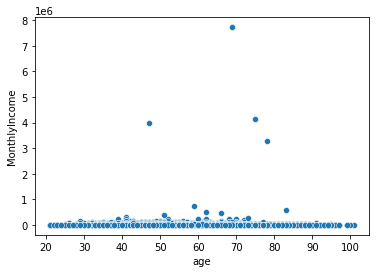

In [81]:
sns.scatterplot(x = linreg_df.age, y = linreg_df.MonthlyIncome)

Well...this doesn't lend itself to linear regression at all...but we try anyway.

## Regression

$y = \alpha + \beta x + \epsilon$ <br> 
Where y is a vector of the monthly income values, x is a vector of the age values and epsilon is the error term. Each observation of monthly income can be explained by some linear relationship with age plus an error. <br> <br>
We need to find the value of alpha and beta that minimises the sum of squared residuals (errors): <br>
${\epsilon}^2 = {(y - \alpha - \beta x)}^2$ <br><br>
Turns out this doesn't need to be solved numerically...

In [98]:
class simple_reg:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.xbar = x.mean()
        self.ybar = y.mean()
    
    def beta_hat(self):
        return sum((self.x - self.xbar)*(self.y - self.ybar)) / sum((self.x - self.xbar)**2)
    
    def alpha_hat(self):
        return self.ybar - self.beta_hat()*self.xbar
    
    def errors(self):
        return self.y - self.alpha_hat() - self.beta_hat()*self.x